Top 10 Batsman by total_runs


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import plotly.express as px
pn.extension()


In [4]:
df = pd.read_csv(r"C:\Users\91703\OneDrive\Documents\ipl-data-pipeline\data\ipl_cleaned.csv")


In [5]:
top_batsmen = (
    df.groupby("batsman")["batsman_run"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


In [6]:
def plot_top_batsmen():
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x=top_batsmen.values,
        y=top_batsmen.index,
        palette="viridis",
        ax=ax
    )
    
    ax.set_title("Top 10 Batsmen by Total Runs", fontsize=14)
    ax.set_xlabel("Runs")
    ax.set_ylabel("Batsman")
    
    # Annotate each bar with the run total
    for i, value in enumerate(top_batsmen.values):
        ax.text(
            value + 2,                      # x-position slightly after bar
            i,                              # y-position (index of bar)
            str(value),                     # the text to show (run count)
            va='center',                    # vertical alignment
            fontsize=10,
            color='black'
        )

    return fig


C:\Users\91703\AppData\Local\Temp\ipykernel_8928\2634628443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


BokehModel(combine_events=True, render_bundle={'docs_json': {'10dd7d2b-6a05-4b22-a32d-db7e717954a1': {'version…

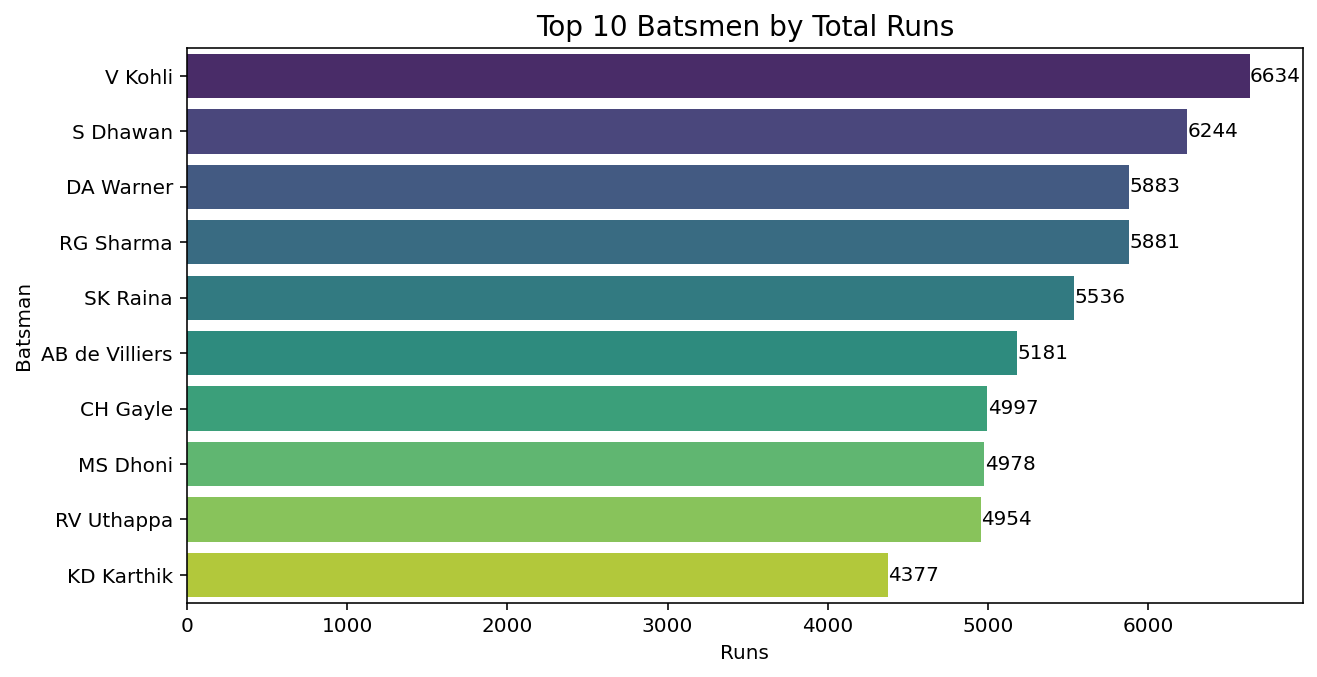

In [7]:
batsmen_panel = pn.pane.Matplotlib(plot_top_batsmen(), tight=True)
batsmen_panel


Top 10 bowlers by wicket        

In [8]:
# Filter the rows where a wicket was taken
wickets_df = df[df["isWicketDelivery"] == 1]

# Count the number of wickets per bowler
top_bowlers = wickets_df["bowler"].value_counts().head(10)


In [10]:
def plot_top_bowlers():
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x=top_bowlers.values,
        y=top_bowlers.index,
        palette="magma",
        ax=ax
    )
    ax.set_title("Top 10 Bowlers by Wickets", fontsize=14)
    ax.set_xlabel("Wickets")
    ax.set_ylabel("Bowler")
    
    # Annotate with values
    for i, value in enumerate(top_bowlers.values):
        ax.text(
            value + 1,  # position after the bar
            i,          # y-position (index)
            str(value),
            va='center',
            fontsize=10,
            color='black'
        )
    return fig



C:\Users\91703\AppData\Local\Temp\ipykernel_8928\942185786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


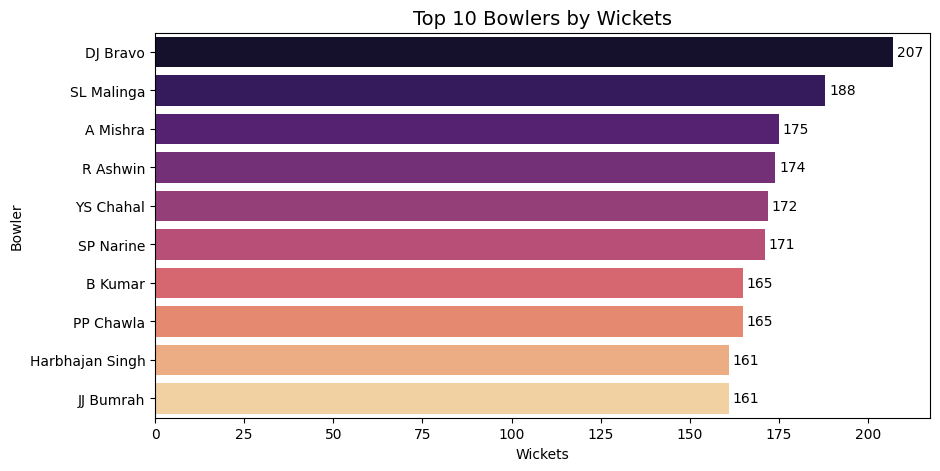

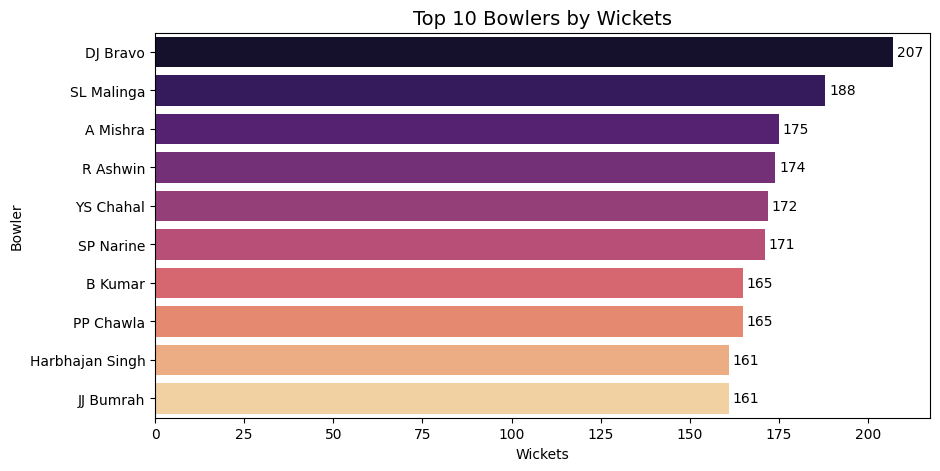

In [11]:


plot_top_bowlers()

Team wise total run chart   

In [5]:
# Step 1: Group data by Batting Team
teamwise_runs = df.groupby('batting_team')['total_run'].sum().sort_values(ascending=False)



# Reuse the grouped data
teamwise_runs_df = teamwise_runs.reset_index()
teamwise_runs_df.columns = ['Team', 'Total Runs']

# Plotly Pie Chart
fig = px.pie(
    teamwise_runs_df,
    names='Team',
    values='Total Runs',
    title='Teamwise Total Runs Distribution',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

